**Welcome to the first practice exercise: Data Inspection and Exploration**

***Before you begin, ensure you have completed the "Exercise Prerequisites" tasks.***

***Go through the "Python - Pandas" slides as well for a quicker understanding of the code to follow.***

In this practice exercise, you will go through the typical preprocessing steps that a dataset undergoes before it's fed to whatever ML algorithms to develop AI-based applications.

These preprocessing steps are pretty much universal, unless you have a perfectly curated and calibrated dataset, which is rare, if not non-existent. 

First, let's import the following two libraries:
1. pandas - helps us in handling and preprocessing the data
2. matplotli.pyplot - for visualizing the data  

In [2]:
import pandas as pd # 'pd' is now an alias for the pandas module
import matplotlib.pyplot as plt # 'plt' is now an alias for the matplotlib.pyplot module

Naturally, the next step would be to load the dataset. The simplest way would be to download your dataset and put the file in the root directory. This exercise uses the "Titanic" dataset, and is already included.

In [3]:
## Define the path to the file. You can use either the full path or the relative path.
file_path = 'titanic.csv' 

## Read the data from the file, which is in CSV format, into a pandas DataFrame (df).
df = pd.read_csv(file_path)

## Print the first 5 rows of the DataFrame.
print(df.head())

## Print the first 5 rows of the DataFrame, but in a more readable format
print(df.head().to_string())

## Print the 'Name' column from the DataFrame.
print(df['Name'])

## Print multiple columns
print(df[['Name', 'Age']])

## Print the number of rows and columns in the DataFrame.
print(df.shape) 

## Print the data types of the columns in the DataFrame.
print(df.dtypes)

## Print the summary statistics of the DataFrame.
print(df.describe())

## Print the number of missing values in each column of the DataFrame.
print(df.isnull().sum())

## Print the number of unique values in each column of the DataFrame.
print(df.nunique())

## Print the number of unique values from a specific column. Here, 'Embarked' column
print(df['Embarked'].nunique())

## TODO: Try other operations on the DataFrame. You will fined them in the "Pandas".

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

There is another user-friendly way of loading the dataset. Assume you don't want to hardcode the path, and want the user to instead supply the path to the dataset. 

In [5]:
# Use 'input' function to take input from the user. This is equivalent to the 'Scanner' class in Java.
file_path = input("Enter the path to your CSV file: ") 
df = pd.read_csv(file_path)

Before you proceed to handling the missing values in your dataset, ensure that every column is of right data type. For example, a numerical column is recorded as a String. Conversely, date-time column may be stored as a string. These should be handled before anything else.

In [6]:
for col in df.columns:    
    
    # 'pd.api.types.is_object_dtype' checks if the column is of object type (i.e., string or categorical)
    if pd.api.types.is_object_dtype(df[col]):
        try:
            df[col] = pd.to_numeric(df[col])
            print(f"Converted column '{col}' to numeric type")
        except ValueError:
            # If conversion fails, it's likely a true categorical column
            print(f"Column '{col}' remains categorical")

Column 'Name' remains categorical
Column 'Sex' remains categorical
Column 'Ticket' remains categorical
Column 'Cabin' remains categorical
Column 'Embarked' remains categorical


Now, let's handle missing values. 

Earlier, when you ran the code to find out columns with empty (NA) values, you would've come across handful of columns that had a lot of NAs. 

If there are too many NAs in a column, it's better to simply drop that column altogether, provided the said column is not important to your analysis. If it is, then there's not much you can do about it, except looking for a different dataset. The alternative of replacing excess number of NAs with mean/median/mode values can distort the dataset and adversely affect your analysis outcomes.

But if there are few NAs, you may drop the entire corresponding row, or replace them with the applicable mean/median/mode values. 

In [7]:
## Calculate the percentage of missing values in each column by iterating over the dataset
for col in df.columns:
    missing_percentage = df[col].isna().mean() * 100
    print(f"Checking '{col}' for missing values: {missing_percentage:.2f}% missing")

    # If more than 50% of values are missing, drop the column. 
    # Here, 50% is just an arbitraty threshold. It can be changed to any other value based on the use case.
    if missing_percentage > 50:
        print(f"Dropping column '{col}' (because more than 50% missing)")
        df.drop(columns=[col], inplace=True)

Checking 'PassengerId' for missing values: 0.00% missing
Checking 'Survived' for missing values: 0.00% missing
Checking 'Pclass' for missing values: 0.00% missing
Checking 'Name' for missing values: 0.00% missing
Checking 'Sex' for missing values: 0.00% missing
Checking 'Age' for missing values: 19.87% missing
Checking 'SibSp' for missing values: 0.00% missing
Checking 'Parch' for missing values: 0.00% missing
Checking 'Ticket' for missing values: 0.00% missing
Checking 'Fare' for missing values: 0.00% missing
Checking 'Cabin' for missing values: 77.10% missing
Dropping column 'Cabin' (because more than 50% missing)
Checking 'Embarked' for missing values: 0.22% missing


Now that you have handled columns with excess number of missing values, you can handle the rest by imputation, which is simply replacing the missing values with mean, median, or mode.

In [8]:
## Impute missing values in each column by iterating over the dataset
for col in df.columns:

    # Impute numeric columns with mean or median, and categorical columns with mode
    if pd.api.types.is_numeric_dtype(df[col]): # Check if the column is numeric
        if missing_percentage > 0:
            median_val = df[col].median()
            print(f"Imputing missing values in '{col}' with median: {median_val}")
            
            # Replace missing values with the median of the column. 
            # Medians are safer than means, as they are less affected by outliers.
            df[col].fillna(median_val, inplace=True) # 'inplace' parameter is used to modify the DataFrame directly, instead of creating a brand new DataFrame, which is the default behavior.
    else:
        if missing_percentage > 0:
            mode_val = df[col].mode()[0]
            print(f"Imputing missing values in '{col}' with mode: {mode_val}")
            df[col].fillna(mode_val, inplace=True)

Imputing missing values in 'PassengerId' with median: 446.0
Imputing missing values in 'Survived' with median: 0.0
Imputing missing values in 'Pclass' with median: 3.0
Imputing missing values in 'Name' with mode: Abbing, Mr. Anthony
Imputing missing values in 'Sex' with mode: male
Imputing missing values in 'Age' with median: 28.0
Imputing missing values in 'SibSp' with median: 0.0
Imputing missing values in 'Parch' with median: 0.0
Imputing missing values in 'Ticket' with mode: 1601
Imputing missing values in 'Fare' with median: 14.4542
Imputing missing values in 'Embarked' with mode: S


Now that NAs have been handled, there are still other issues that may affect the quality of the dataset. Obvious ones would be incorrectly formatted data type (commas in numbers), incorrect data (negative values, impossible values, etc.), or duplicates. Code to address every one of these issue is available in the "Pandas" slides. Use it to try the operations needed to further clean your dataset.

In [9]:
# TODO: Write the logic to handle incorrectly formatted data type, incorrect data, and duplicates

The next step is not necessary for preparing your data, but it certainly helps you understand your data. The following code helps you classify every column as either nominal, ordinal, interval, or ratio.

In [10]:
for col in df.columns:

    unique_vals = df[col].nunique()

    if pd.api.types.is_numeric_dtype(df[col]):
        # Numeric data with few unique values, treat as ordinal
        if unique_vals < 10: # Arbitrary threshold for number of unique values. Can be changed based on the use case.
            median_val = df[col].median()
            print(f'{col}: Numeric Ordinal - Median: {median_val}')
            #plot_boxplot(col, col)  # Plot a boxplot for ordinal numeric data
            
        else:
            # Numeric data with many unique values, treat as continuous
            mean_val = df[col].mean()
            print(f'{col}: Numeric (Interval/Ratio) - Mean: {mean_val}')
            #plot_histogram(col)  # Plot a histogram for continuous numeric data
            
    elif pd.api.types.is_object_dtype(df[col]):
        # Non-numeric ordinal data (e.g., Low, Medium, High)
        if unique_vals < 10:
            mode_val = df[col].mode()[0]
            print(f'{col}: Non-Numeric Ordinal - Mode: {mode_val}')
            #plot_bar_chart(col)  # Plot a bar chart for ordinal non-numeric data
            
        else:
            print(f'{col}: Non-Numeric Categorical (Too many unique values)')
            
    else:
        print(f'{col}: Unrecognized type')

PassengerId: Numeric (Interval/Ratio) - Mean: 446.0
Survived: Numeric Ordinal - Median: 0.0
Pclass: Numeric Ordinal - Median: 3.0
Name: Non-Numeric Categorical (Too many unique values)
Sex: Non-Numeric Ordinal - Mode: male
Age: Numeric (Interval/Ratio) - Mean: 29.36158249158249
SibSp: Numeric Ordinal - Median: 0.0
Parch: Numeric Ordinal - Median: 0.0
Ticket: Non-Numeric Categorical (Too many unique values)
Fare: Numeric (Interval/Ratio) - Mean: 32.204207968574636
Embarked: Non-Numeric Ordinal - Mode: S


Now that you know what type of data your dataset comprises, you can start to visualize them to gain some preliminary insights, which can help you in picking out the right variables (features) for ML algorithm training.

First, let's start with boxplot. This plot is useful for plotting nominal/ordinal vs. interval/ratio types.


Ordinal/Nominal columns available for X-axis:
1: Survived
2: Pclass
3: Name
4: Sex
5: SibSp
6: Parch
7: Ticket
8: Embarked

Numeric columns available for Y-axis:
1: PassengerId
2: Survived
3: Pclass
4: Age
5: SibSp
6: Parch
7: Fare


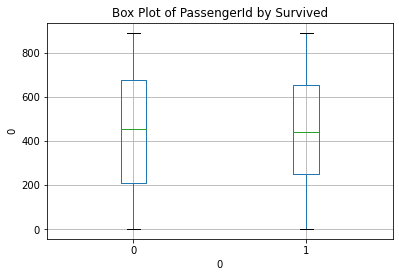

In [11]:
# The following simply creates a list out of all the columns that are not numeric or have less than 10 unique values
ordinal_or_nominal_cols = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col]) or df[col].nunique() < 10]

# The following creates a list of all the columns that are numeric
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

print("\nOrdinal/Nominal columns available for X-axis:")
# 'enumerate' is used to get the index of the column along with the column name
for i, col in enumerate(ordinal_or_nominal_cols):
    print(f"{i+1}: {col}")

print("\nNumeric columns available for Y-axis:")
for i, col in enumerate(numeric_cols):
    print(f"{i+1}: {col}")

# Ask the user to select the X-axis and Y-axis columns. 
# 'int' is used to convert the input to an integer, as 'input' returns a string by default.
# '-1' is used to convert the user's choice to the correct index (since Python is 0-indexed)
x_idx = int(input("Enter the number for the X-axis column: ")) - 1
y_idx = int(input("Enter the number for the Y-axis column: ")) - 1

# Check if the user's choice is within the valid range of column indices
if 0 <= x_idx < len(ordinal_or_nominal_cols) and 0 <= y_idx < len(numeric_cols):
    df.boxplot(column=numeric_cols[y_idx], by=ordinal_or_nominal_cols[x_idx])
    plt.title(f'Box Plot of {numeric_cols[y_idx]} by {ordinal_or_nominal_cols[x_idx]}')
    plt.suptitle('')  # Removes the default Pandas title
    plt.xlabel(x_idx)
    plt.ylabel(y_idx)
    plt.show()
else:
    print("Invalid selection. Please select numbers corresponding to the column list.")


Next is scatterplot, which is a plot between two interval/ratio variables.


Numeric columns available for scatterplot:
1: PassengerId
2: Survived
3: Pclass
4: Age
5: SibSp
6: Parch
7: Fare


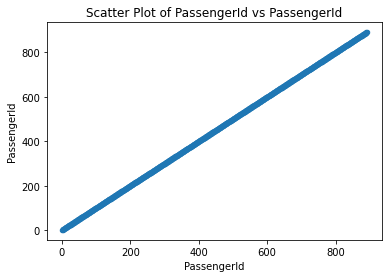

In [12]:
print("\nNumeric columns available for scatterplot:")
for i, col in enumerate(numeric_cols):
    print(f"{i+1}: {col}")

# here both the columns will be numerical
x_idx = int(input("Enter the number for the X-axis column: ")) - 1
y_idx = int(input("Enter the number for the Y-axis column: ")) - 1

if 0 <= x_idx < len(numeric_cols) and 0 <= y_idx < len(numeric_cols):
    df.plot.scatter(x=numeric_cols[x_idx], y=numeric_cols[y_idx], title=f'Scatter Plot of {numeric_cols[x_idx]} vs {numeric_cols[y_idx]}')
    plt.xlabel(numeric_cols[x_idx])
    plt.ylabel(numeric_cols[y_idx])
    plt.show()
else:
    print("Invalid selection. Please select numbers corresponding to the column list.")

Next is bar chart. This visualization is meant for categorical variables.

1: Survived
2: Pclass
3: Name
4: Sex
5: SibSp
6: Parch
7: Ticket
8: Embarked


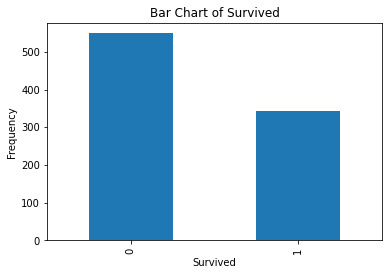

In [13]:
ordinal_cols = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col]) or df[col].nunique() < 10]

for i, col in enumerate(ordinal_cols):
    print(f"{i+1}: {col}")

# here the user enters value only for the X-axis, as Y-axis will be frequency by default. 
num_col = int(input("Enter the number for the X-axis column: ")) - 1

df[ordinal_cols[num_col]].value_counts().plot(kind='bar', title=f'Bar Chart of {ordinal_cols[num_col]}')
plt.xlabel(ordinal_cols[num_col])
plt.ylabel('Frequency')
plt.show()

Finally, histogram. This visualization is helpful in figuring out the distribution of your numerical (interval or ratio) data, whether it's normally distributed or skewed. 

1: PassengerId
2: Survived
3: Pclass
4: Age
5: SibSp
6: Parch
7: Fare


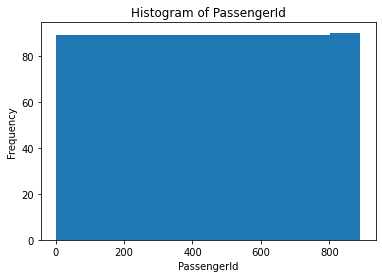

In [14]:
for i, col in enumerate(numeric_cols):
    print(f"{i+1}: {col}")

# here, the user selects only one column, and it will be a numerical column
num_col = int(input("Enter the number for the X-axis column: ")) - 1

df[numeric_cols[num_col]].plot(kind='hist', title=f'Histogram of {numeric_cols[num_col]}')
plt.xlabel(numeric_cols[num_col])
plt.show()